In [1]:
from backtesting import Backtest, Strategy

/home/auqdah/.local/lib/python3.7/site-packages/backtesting/_plotting.py:45: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [81]:
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
from pandas_datareader import data as pdr
import pandas as pd

In [4]:
yf.pdr_override()

In [71]:
data = pdr.get_data_yahoo("^GSPC",start="2010-01-04", interval = "1mo")

[*********************100%***********************]  1 of 1 completed


In [72]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-02-01,1073.890015,1112.420044,1044.500000,1104.489990,1104.489990,84561340000
2010-03-01,1105.359985,1180.689941,1105.359985,1169.430054,1169.430054,103683550000
2010-04-01,1171.229980,1219.800049,1170.689941,1186.689941,1186.689941,116741910000
2010-05-01,1188.579956,1205.130005,1040.780029,1089.410034,1089.410034,127662780000
2010-06-01,1087.300049,1131.229980,1028.329956,1030.709961,1030.709961,110106750000
...,...,...,...,...,...,...
2020-11-01,3296.199951,3645.989990,3279.739990,3621.629883,3621.629883,100977880000
2020-12-01,3645.870117,3760.199951,3633.399902,3756.070068,3756.070068,96056410000
2021-01-01,3764.610107,3870.899902,3662.709961,3714.239990,3714.239990,105548790000


In [85]:
returns = data['Adj Close'].resample('M').ffill().pct_change()
returns

Date
2010-02-28         NaN
2010-04-30    0.074423
2010-06-30   -0.131441
2010-08-31    0.018065
2010-10-31    0.127634
                ...   
2020-06-30    0.064503
2020-08-31    0.129027
2020-10-31   -0.065808
2020-12-31    0.148659
2021-02-28    0.042039
Freq: 2M, Name: Adj Close, Length: 67, dtype: float64

In [75]:
returns.rolling(2).std()

Date
2010-02-28         NaN
2010-03-31         NaN
2010-04-30    0.031139
2010-05-31    0.068402
2010-06-30    0.019865
                ...   
2020-10-31    0.008176
2020-11-30    0.095609
2020-12-31    0.049797
2021-01-31    0.034124
2021-02-28    0.045899
Freq: M, Name: Adj Close, Length: 133, dtype: float64

In [80]:
cum_returns = (returns + 1).cumprod()
cum_returns

Date
2010-02-28         NaN
2010-03-31    1.058796
2010-04-30    1.074423
2010-05-31    0.986347
2010-06-30    0.933200
                ...   
2020-10-31    2.960606
2020-11-30    3.279007
2020-12-31    3.400728
2021-01-31    3.362855
2021-02-28    3.543690
Freq: M, Name: Adj Close, Length: 133, dtype: float64

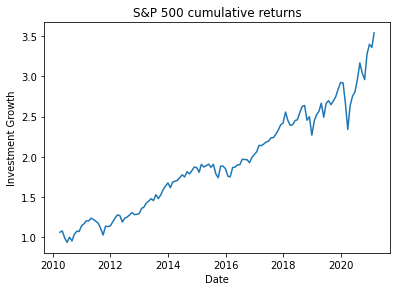

In [84]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
cum_returns = (returns + 1).cumprod()
ax1.plot(cum_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Investment Growth")
ax1.set_title("S&P 500 cumulative returns")
plt.show()

In [38]:
data.ta.cci(length=20)[50:100]

2014-04-01    115.095574
2014-05-01    120.943647
2014-06-01    127.932239
2014-07-01    116.774863
2014-08-01    115.668266
2014-09-01    112.963756
2014-10-01     90.115867
2014-11-01    132.138863
2014-12-01    117.536906
2015-01-01     95.684332
2015-02-01    115.014691
2015-03-01    109.612895
2015-04-01    108.743257
2015-05-01    113.803326
2015-06-01     93.113200
2015-07-01     92.644964
2015-08-01      0.643654
2015-09-01    -49.355013
2015-10-01     23.333211
2015-11-01     68.743764
2015-12-01     34.946842
2016-01-01   -118.401861
2016-02-01   -145.292318
2016-03-01      1.017416
2016-04-01     58.316655
2016-05-01     60.246510
2016-06-01     48.965437
2016-07-01    138.131324
2016-08-01    154.871822
2016-09-01    125.823086
2016-10-01     91.144517
2016-11-01    113.250269
2016-12-01    166.860712
2017-01-01    175.413805
2017-02-01    184.072844
2017-03-01    166.051995
2017-04-01    148.679529
2017-05-01    144.697306
2017-06-01    141.190331
2017-07-01    131.180217


In [40]:
data.ta.ema(length=20)[50:100]

2014-04-01    1672.269485
2014-05-01    1696.202862
2014-06-01    1721.348302
2014-07-01    1741.283706
2014-08-01    1766.244305
2014-09-01    1785.867708
2014-10-01    1807.980312
2014-11-01    1832.702193
2014-12-01    1854.244832
2015-01-01    1867.649132
2015-02-01    1890.206358
2015-03-01    1907.128599
2015-04-01    1924.117305
2015-05-01    1941.571837
2015-06-01    1953.146911
2015-07-01    1967.498642
2015-08-01    1967.944490
2015-09-01    1963.381208
2015-10-01    1974.426818
2015-11-01    1984.520446
2015-12-01    1990.179445
2016-01-01    1985.423307
2016-02-01    1980.357276
2016-03-01    1987.917534
2016-04-01    1995.287298
2016-05-01    2004.969455
2016-06-01    2013.911422
2016-07-01    2029.119867
2016-08-01    2042.627494
2016-09-01    2054.593449
2016-10-01    2061.408349
2016-11-01    2074.494226
2016-12-01    2090.145260
2017-01-01    2108.119056
2017-02-01    2132.454374
2017-03-01    2154.384431
2017-04-01    2176.271623
2017-05-01    2198.702902
2017-06-01  

In [44]:
data.ta.rsi(length=20)[20:40]

2011-10-01    55.365702
2011-11-01    54.825657
2011-12-01    55.590874
2012-01-01    59.326779
2012-02-01    62.549893
2012-03-01    64.901631
2012-04-01    63.859889
2012-05-01    56.011154
2012-06-01    59.139589
2012-07-01    60.127833
2012-08-01    61.677719
2012-09-01    63.543186
2012-10-01    60.932061
2012-11-01    61.168896
2012-12-01    61.776242
2013-01-01    65.819501
2013-02-01    66.674423
2013-03-01    69.330735
2013-04-01    70.614393
2013-05-01    72.053470
Name: RSI_20, dtype: float64

In [52]:
data.ta.roc()[20:40]

2011-10-01    -0.345088
2011-11-01    -3.044820
2011-12-01    -5.245551
2012-01-01    -1.012190
2012-02-01     0.151808
2012-03-01     4.703391
2012-04-01     5.850952
2012-05-01     1.396750
2012-06-01    11.754138
2012-07-01    21.910510
2012-08-01    12.230105
2012-09-01    15.534587
2012-10-01    12.290081
2012-11-01     7.906829
2012-12-01     4.430751
2013-01-01     6.364354
2013-02-01     8.353186
2013-03-01    19.755328
2013-04-01    17.282104
2013-05-01    18.227826
Name: ROC_10, dtype: float64

In [57]:
data.ta.roc()[20:40].rolling(2).std()

2011-10-01         NaN
2011-11-01    1.908998
2011-12-01    1.556152
2012-01-01    2.993438
2012-02-01    0.823071
2012-03-01    3.218456
2012-04-01    0.811448
2012-05-01    3.149596
2012-06-01    7.323779
2012-07-01    7.181639
2012-08-01    6.845080
2012-09-01    2.336622
2012-10-01    2.294212
2012-11-01    3.099427
2012-12-01    2.457958
2013-01-01    1.367264
2013-02-01    1.406316
2013-03-01    8.062532
2013-04-01    1.748834
2013-05-01    0.668727
Name: ROC_10, dtype: float64

In [50]:
data.ta.obv()[20:40]

2011-10-01    1.638588e+10
2011-11-01   -6.788917e+10
2011-12-01    6.853260e+09
2012-01-01    8.642082e+10
2012-02-01    1.648065e+11
2012-03-01    2.487062e+11
2012-04-01    1.739445e+11
2012-05-01    8.702399e+10
2012-06-01    1.686064e+11
2012-07-01    2.417102e+11
2012-08-01    3.119940e+11
2012-09-01    3.817783e+11
2012-10-01    3.100260e+11
2012-11-01    3.815153e+11
2012-12-01    4.479035e+11
2013-01-01    5.237520e+11
2013-02-01    5.930255e+11
2013-03-01    6.615526e+11
2013-04-01    7.386506e+11
2013-05-01    8.150978e+11
Name: OBV, dtype: float64

In [51]:
data.ta.willr()[20:40]

2011-10-01   -36.551740
2011-11-01   -41.790346
2011-12-01   -38.193437
2012-01-01   -19.664627
2012-02-01    -4.075571
2012-03-01    -3.101241
2012-04-01    -7.039490
2012-05-01   -32.234416
2012-06-01   -17.324005
2012-07-01   -12.387463
2012-08-01    -5.711715
2012-09-01    -8.465494
2012-10-01   -15.597633
2012-11-01   -14.591974
2012-12-01   -15.298424
2013-01-01    -3.846265
2013-02-01    -5.976143
2013-03-01    -0.359125
2013-04-01     0.000000
2013-05-01   -13.424045
Name: WILLR_14, dtype: float64

In [29]:
data.index[-1]

Timestamp('2021-02-18 00:00:00')

In [30]:
from backtesting import Strategy


class SmaCross(Strategy):

    def init(self):
           self.buy()
    
    def next(self):
        if(self.data.index[-1]==pd.Timestamp('2019-12-31 00:00:00')):
            self.position.close()
            self.sell()

In [31]:
bt = Backtest(data, SmaCross, cash=10_000, commission=.002)
stats = bt.run()
stats

Start                     2010-02-01 00:00:00
End                       2021-02-18 00:00:00
Duration                   4035 days 00:00:00
Exposure Time [%]                     99.2537
Equity Final [$]                      35274.6
Equity Peak [$]                       35445.3
Return [%]                            234.143
Buy & Hold Return [%]                 254.369
Return (Ann.) [%]                     2573.81
Volatility (Ann.) [%]                 2367.96
Sharpe Ratio                          1.08693
Sortino Ratio                         53.8612
Calmar Ratio                          128.825
Max. Drawdown [%]                    -19.9792
Avg. Drawdown [%]                    -5.59751
Max. Drawdown Duration      427 days 00:00:00
Avg. Drawdown Duration      138 days 00:00:00
# Trades                                    1
Win Rate [%]                              100
Best Trade [%]                        253.554
Worst Trade [%]                       253.554
Avg. Trade [%]                    

In [32]:
bt.plot()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Superimposed OHLC plot matches the original plot. Skipping.
  """Entry point for launching an IPython kernel.


In [33]:
stats._trades

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,9,1,133,1107.570705,3915.860107,25274.604619,2.53554,2010-03-01,2021-02-18,4007 days


In [34]:
import pandas_ta as ta

In [86]:
ticker_df = pd.read_csv('ticker.csv')

In [87]:
ticker_df

,Name,Ticker
0,Apple Inc.,AAPL
1,Microsoft Corporation,MSFT
2,Amazon.com Inc.,AMZN
3,Facebook Inc. Class A,FB
4,Alphabet Inc. Class A,GOOGL
...,...,...
500,Vontier Corp,VNT
501,Under Armour Inc. Class A,UAA
502,Xerox Holdings Corporation,XRX
503,Under Armour Inc. Class C,UA


In [88]:
ticker_df.index += 1

In [91]:
ticker_df.iloc[0][1]

'AAPL'

In [267]:
df2 = pdr.get_data_yahoo(ticker_df.iloc[0][1],start="2010-01-04", interval = "1mo")

[*********************100%***********************]  1 of 1 completed


In [268]:
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-02-01,6.870357,7.327500,6.816071,7.307857,6.294721,1.077608e+10
2010-03-01,7.348214,8.481429,7.337500,8.392857,7.229299,1.215417e+10
2010-04-01,8.478929,9.730714,8.312500,9.324643,8.031907,1.236713e+10
2010-05-01,9.422857,9.567143,7.116071,9.174286,7.902396,1.808265e+10
2010-06-01,9.274643,9.964643,8.650000,8.983214,7.737815,1.665125e+10
...,...,...,...,...,...,...
2020-12-01,121.010002,138.789993,120.010002,132.690002,132.492020,2.322831e+09
2021-01-01,133.520004,145.089996,126.379997,131.960007,131.763107,2.240534e+09
2021-02-01,133.750000,137.880005,127.410004,129.710007,129.516464,1.059208e+09


In [269]:
returns = df2['Adj Close'].resample('4M').ffill().pct_change()[1:]
print(type(returns))

<class 'pandas.core.series.Series'>


In [102]:
df2['Name'] = ticker_df.iloc[0][1]
df2 = df2.reset_index()

In [103]:
df2.set_index(['Name','Date'])

Open        High         Low       Close   Adj Close  \
Name Date                                                                     
AAPL 2010-02-01    6.870357    7.327500    6.816071    7.307857    6.294721   
     2010-03-01    7.348214    8.481429    7.337500    8.392857    7.229299   
     2010-04-01    8.478929    9.730714    8.312500    9.324643    8.031907   
     2010-05-01    9.422857    9.567143    7.116071    9.174286    7.902396   
     2010-06-01    9.274643    9.964643    8.650000    8.983214    7.737815   
...                     ...         ...         ...         ...         ...   
     2020-12-01  121.010002  138.789993  120.010002  132.690002  132.492020   
     2021-01-01  133.520004  145.089996  126.379997  131.960007  131.763107   
     2021-02-01  133.750000  137.880005  127.410004  129.710007  129.516464   
     2021-02-05         NaN         NaN         NaN         NaN         NaN   
     2021-02-19  130.240005  130.710007  128.800003  129.869995  129.869995   

                       Volume  
Name Date                      
AAPL 2010-02-01  1.077608e+10  
     2010-03-01  1.215417e+10  
     2010-04-01  1.236713e+10  
     2010-05-01  1.808265e+10  
     2010-06-01  1.665125e+10  
...                       ...  
     2020-12-01  2.322831e+09  
     2021-01-01  2.240534e+09  
     2021-02-01  1.059208e+09  
     2021-02-05           NaN  
     2021-02-19  8.415880e+07  

[171 rows x 6 columns]

ValueError: The level Date is not valid

In [139]:
df2.groupby([pd.Grouper(freq='4M', level=-1)])['Adj Close'].ffill().pct_change()[1:]

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'MultiIndex'

In [125]:
df2.index.names

FrozenList([None])

In [117]:
print(df2.index.name)

None


In [126]:
print(df2.index.get_level_values(0))

RangeIndex(start=0, stop=171, step=1)


In [129]:
df2.index = list(df2.index)

In [131]:
df2

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2010-02-01,6.870357,7.327500,6.816071,7.307857,6.294721,1.077608e+10,AAPL
1,2010-03-01,7.348214,8.481429,7.337500,8.392857,7.229299,1.215417e+10,AAPL
2,2010-04-01,8.478929,9.730714,8.312500,9.324643,8.031907,1.236713e+10,AAPL
3,2010-05-01,9.422857,9.567143,7.116071,9.174286,7.902396,1.808265e+10,AAPL
4,2010-06-01,9.274643,9.964643,8.650000,8.983214,7.737815,1.665125e+10,AAPL
...,...,...,...,...,...,...,...,...
166,2020-12-01,121.010002,138.789993,120.010002,132.690002,132.492020,2.322831e+09,AAPL
167,2021-01-01,133.520004,145.089996,126.379997,131.960007,131.763107,2.240534e+09,AAPL
168,2021-02-01,133.750000,137.880005,127.410004,129.710007,129.516464,1.059208e+09,AAPL
169,2021-02-05,NaN,NaN,NaN,NaN,NaN,NaN,AAPL


In [132]:
df2.set_index(['Name','Date'],inplace=True)

In [134]:
df2.index

MultiIndex([('AAPL', '2010-02-01'),
            ('AAPL', '2010-03-01'),
            ('AAPL', '2010-04-01'),
            ('AAPL', '2010-05-01'),
            ('AAPL', '2010-06-01'),
            ('AAPL', '2010-07-01'),
            ('AAPL', '2010-08-01'),
            ('AAPL', '2010-09-01'),
            ('AAPL', '2010-10-01'),
            ('AAPL', '2010-11-01'),
            ...
            ('AAPL', '2020-08-31'),
            ('AAPL', '2020-09-01'),
            ('AAPL', '2020-10-01'),
            ('AAPL', '2020-11-01'),
            ('AAPL', '2020-11-06'),
            ('AAPL', '2020-12-01'),
            ('AAPL', '2021-01-01'),
            ('AAPL', '2021-02-01'),
            ('AAPL', '2021-02-05'),
            ('AAPL', '2021-02-19')],
           names=['Name', 'Date'], length=171)

In [157]:
df2.groupby([pd.Grouper(freq='3M', level="Date"),pd.Grouper(level="Name")])['Adj Close'].ffill().pct_change()[1:]

Name  Date      
AAPL  2010-03-01    0.148470
      2010-04-01    0.111022
      2010-05-01   -0.016125
      2010-06-01   -0.020827
      2010-07-01    0.022741
                      ...   
      2020-12-01    0.116497
      2021-01-01   -0.005502
      2021-02-01   -0.017051
      2021-02-05    0.000000
      2021-02-19    0.002730
Name: Adj Close, Length: 170, dtype: float64

In [162]:
def total_return_sampler(x):    
    return x.set_index('Date').resample('4M')['Adj Close'].ffill().pct_change()[1:]

In [163]:
df2.reset_index(level=1).groupby(level=0).apply(total_return_sampler)

Date,2010-03-01,2010-04-01,2010-05-01,2010-06-01,2010-07-01,2010-08-01,2010-09-01,2010-10-01,2010-11-01,2010-12-01,...,2020-08-31,2020-09-01,2020-10-01,2020-11-01,2020-11-06,2020-12-01,2021-01-01,2021-02-01,2021-02-05,2021-02-19
Name,,,,,,,,,,,,,,,,,,,,,
AAPL,0.14847,0.111022,-0.016125,-0.020827,0.022741,-0.055005,0.167215,0.060722,0.03379,0.03667,...,0.0,-0.100908,-0.060012,0.093606,0.0,0.116497,-0.005502,-0.017051,0.0,0.00273


In [244]:
df3 = (df2.reset_index(level=[0])
        ['Adj Close'].resample('4M')
        .ffill().pct_change()[1:]).to_frame()

In [245]:
df3['Name'] = 'AAPL'
df3.reset_index(inplace=True)
df3.set_index(['Name','Date'],inplace=True)

In [235]:
df3

Adj Close
Name Date                 
AAPL 2010-06-30   0.229255
     2010-10-31   0.196596
     2011-02-28   0.173534
     2011-06-30  -0.049659
     2011-10-31   0.205887
     2012-02-29   0.340086
     2012-06-30   0.076617
     2012-10-31   0.023760
     2013-02-28   0.000000
     2013-06-30  -0.322525
     2013-10-31   0.326889
     2014-02-28   0.000000
     2014-06-30   0.000000
     2014-10-31   0.478983
     2015-02-28   0.000000
     2015-06-30   0.175920
     2015-10-31  -0.042965
     2016-02-29   0.000000
     2016-06-30  -0.187298
     2016-10-31   0.194090
     2017-02-28   0.000000
     2017-06-30   0.285777
     2017-10-31   0.178335
     2018-02-28   0.000000
     2018-06-30   0.107739
     2018-10-31   0.186471
     2019-02-28   0.000000
     2019-06-30  -0.085121
     2019-10-31   0.261647
     2020-02-29   0.000000
     2020-06-30   0.478358
     2020-10-31   0.195793
     2021-02-28   0.196844

In [239]:
df3 = pdr.get_data_yahoo(ticker_df.iloc[1][1],start="2010-01-04", interval = "1mo")

[*********************100%***********************]  1 of 1 completed


In [240]:
df3['Name'] = ticker_df.iloc[1][1]
df3 = df3.reset_index()
df3.set_index(['Name','Date'],inplace=True)

In [241]:
df3

Open        High         Low       Close   Adj Close  \
Name Date                                                                     
MSFT 2010-02-01   28.389999   29.030001   27.570000   28.670000   22.278278   
     2010-02-16         NaN         NaN         NaN         NaN         NaN   
     2010-03-01   28.770000   30.570000   28.240000   29.290001   22.866486   
     2010-04-01   29.350000   31.580000   28.620001   30.540001   23.842352   
     2010-05-01   30.670000   31.059999   24.559999   25.799999   20.141876   
...                     ...         ...         ...         ...         ...   
     2020-12-01  214.509995  227.179993  209.110001  222.419998  221.908905   
     2021-01-01  222.529999  242.639999  211.940002  231.960007  231.426987   
     2021-02-01  235.059998  246.130005  232.429993  243.789993  243.229797   
     2021-02-17         NaN         NaN         NaN         NaN         NaN   
     2021-02-19  243.750000  243.860001  240.179993  240.970001  240.970001   

                       Volume  
Name Date                      
MSFT 2010-02-01  1.074643e+09  
     2010-02-16           NaN  
     2010-03-01  1.110237e+09  
     2010-04-01  1.319030e+09  
     2010-05-01  1.720130e+09  
...                       ...  
     2020-12-01  5.947908e+08  
     2021-01-01  6.480981e+08  
     2021-02-01  2.952590e+08  
     2021-02-17           NaN  
     2021-02-19  2.448336e+07  

[179 rows x 6 columns]

In [242]:
df4 = (df3.reset_index(level=[0])
        ['Adj Close'].resample('4M')
        .ffill().pct_change()[1:]).to_frame()

In [243]:
df4['Name'] = ticker_df.iloc[1][1]
df4 = df4.reset_index()
df4.set_index(['Name','Date'],inplace=True)

In [236]:
df3

Adj Close
Name Date                 
AAPL 2010-06-30   0.229255
     2010-10-31   0.196596
     2011-02-28   0.173534
     2011-06-30  -0.049659
     2011-10-31   0.205887
     2012-02-29   0.340086
     2012-06-30   0.076617
     2012-10-31   0.023760
     2013-02-28   0.000000
     2013-06-30  -0.322525
     2013-10-31   0.326889
     2014-02-28   0.000000
     2014-06-30   0.000000
     2014-10-31   0.478983
     2015-02-28   0.000000
     2015-06-30   0.175920
     2015-10-31  -0.042965
     2016-02-29   0.000000
     2016-06-30  -0.187298
     2016-10-31   0.194090
     2017-02-28   0.000000
     2017-06-30   0.285777
     2017-10-31   0.178335
     2018-02-28   0.000000
     2018-06-30   0.107739
     2018-10-31   0.186471
     2019-02-28   0.000000
     2019-06-30  -0.085121
     2019-10-31   0.261647
     2020-02-29   0.000000
     2020-06-30   0.478358
     2020-10-31   0.195793
     2021-02-28   0.196844

In [259]:
combine = df4.append(df3).sort_index(axis=1,level=1)

In [247]:
combine.head(50)

Adj Close
Name Date                 
MSFT 2010-06-30        NaN
     2010-10-31   0.165244
     2011-02-28   0.000000
     2011-06-30  -0.006867
     2011-10-31   0.030695
     2012-02-29   0.000000
     2012-06-30   0.172617
     2012-10-31  -0.060835
     2013-02-28   0.000000
     2013-06-30   0.238905
     2013-10-31   0.032412
     2014-02-28   0.000000
     2014-06-30   0.203896
     2014-10-31   0.132931
     2015-02-28   0.000000
     2015-06-30  -0.040779
     2015-10-31   0.200161
     2016-02-29   0.000000
     2016-06-30  -0.007453
     2016-10-31   0.178297
     2017-02-28   0.000000
     2017-06-30   0.171838
     2017-10-31   0.213161
     2018-02-28   0.000000
     2018-06-30   0.202240
     2018-10-31   0.087324
     2019-02-28   0.000000
     2019-06-30   0.269670
     2019-10-31   0.073809
     2020-02-29   0.000000
     2020-06-30   0.432172
     2020-10-31  -0.002705
     2021-02-28   0.196016
AAPL 2010-06-30   0.229255
     2010-10-31   0.196596
     2011-02-28   0.173534
     2011-06-30  -0.049659
     2011-10-31   0.205887
     2012-02-29   0.340086
     2012-06-30   0.076617
     2012-10-31   0.023760
     2013-02-28   0.000000
     2013-06-30  -0.322525
     2013-10-31   0.326889
     2014-02-28   0.000000
     2014-06-30   0.000000
     2014-10-31   0.478983
     2015-02-28   0.000000
     2015-06-30   0.175920
     2015-10-31  -0.042965

In [281]:
combine['Cum Returns'] = (combine['Adj Close'] + 1).groupby('Name').cumprod()

In [282]:
combine.head(50)

Adj Close  Cum Returns
Name Date                              
MSFT 2010-06-30        NaN          NaN
     2010-10-31   0.165244     1.165244
     2011-02-28   0.000000     1.165244
     2011-06-30  -0.006867     1.157243
     2011-10-31   0.030695     1.192765
     2012-02-29   0.000000     1.192765
     2012-06-30   0.172617     1.398657
     2012-10-31  -0.060835     1.313570
     2013-02-28   0.000000     1.313570
     2013-06-30   0.238905     1.627389
     2013-10-31   0.032412     1.680136
     2014-02-28   0.000000     1.680136
     2014-06-30   0.203896     2.022709
     2014-10-31   0.132931     2.291591
     2015-02-28   0.000000     2.291591
     2015-06-30  -0.040779     2.198143
     2015-10-31   0.200161     2.638126
     2016-02-29   0.000000     2.638126
     2016-06-30  -0.007453     2.618464
     2016-10-31   0.178297     3.085329
     2017-02-28   0.000000     3.085329
     2017-06-30   0.171838     3.615506
     2017-10-31   0.213161     4.386191
     2018-02-28   0.000000     4.386191
     2018-06-30   0.202240     5.273255
     2018-10-31   0.087324     5.733738
     2019-02-28   0.000000     5.733738
     2019-06-30   0.269670     7.279954
     2019-10-31   0.073809     7.817277
     2020-02-29   0.000000     7.817277
     2020-06-30   0.432172    11.195688
     2020-10-31  -0.002705    11.165400
     2021-02-28   0.196016    13.353994
AAPL 2010-06-30   0.229255     1.229255
     2010-10-31   0.196596     1.470921
     2011-02-28   0.173534     1.726176
     2011-06-30  -0.049659     1.640455
     2011-10-31   0.205887     1.978204
     2012-02-29   0.340086     2.650963
     2012-06-30   0.076617     2.854071
     2012-10-31   0.023760     2.921884
     2013-02-28   0.000000     2.921884
     2013-06-30  -0.322525     1.979505
     2013-10-31   0.326889     2.626583
     2014-02-28   0.000000     2.626583
     2014-06-30   0.000000     2.626583
     2014-10-31   0.478983     3.884672
     2015-02-28   0.000000     3.884672
     2015-06-30   0.175920     4.568064
     2015-10-31  -0.042965     4.371797

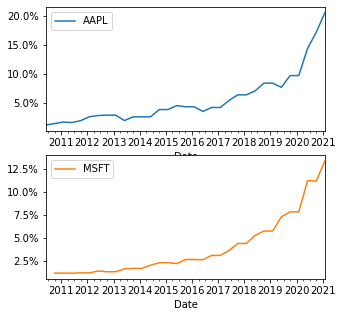

In [328]:
import matplotlib.ticker as mtick
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(5,5))

combine.unstack(level=0)['Cum Returns'].plot(kind='line',ax=axes,subplots=True)
for a in axes:
    a.yaxis.set_major_formatter(mtick.PercentFormatter())

In [335]:
tickers = ticker_df['Ticker'].to_list()

In [353]:
dfs = []
k = 4
for ticker in tickers:
    print('Grabbing ' + ticker + " data!")
    curr_df = pdr.get_data_yahoo(ticker, start="2010-01-04", interval = "1mo")
    if(curr_df.empty):
        print('Failed to get ' + ticker + 'stock data!')
        continue
    curr_df['Name'] = ticker
    curr_df = curr_df.reset_index()
    curr_df.set_index(['Name','Date'],inplace=True)
    curr_df = curr_df[~curr_df.index.duplicated(keep='first')]
    obs_df = (curr_df.reset_index(level=[0])
        ['Adj Close'].resample(str(k) + 'M')
        .ffill().pct_change()[1:]).to_frame()
    obs_df['Name'] = ticker
    obs_df = obs_df.reset_index()
    obs_df.set_index(['Name','Date'],inplace=True)
    obs_df['Cum Returns'] = (obs_df['Adj Close'] + 1).groupby('Name').cumprod()
    dfs.append(obs_df)
    curr_df = None
    obs_df = None

Grabbing AAPL data!
[*********************100%***********************]  1 of 1 completed
Grabbing MSFT data!
[*********************100%***********************]  1 of 1 completed
Grabbing AMZN data!
[*********************100%***********************]  1 of 1 completed
Grabbing FB data!
[*********************100%***********************]  1 of 1 completed
Grabbing GOOGL data!
[*********************100%***********************]  1 of 1 completed
Grabbing GOOG data!
[*********************100%***********************]  1 of 1 completed
Grabbing TSLA data!
[*********************100%***********************]  1 of 1 completed
Grabbing BRK.B data!
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRK.B: No data found, symbol may be delisted
Failed to get BRK.Bstock data!
Grabbing JPM data!
[*********************100%***********************]  1 of 1 completed
Grabbing JNJ data!
[*********************100%***********************]  1 of 1 completed
Grabbing NVDA 

[*********************100%***********************]  1 of 1 completed
Grabbing ZTS data!
[*********************100%***********************]  1 of 1 completed
Grabbing PLD data!
[*********************100%***********************]  1 of 1 completed
Grabbing MDLZ data!
[*********************100%***********************]  1 of 1 completed
Grabbing TFC data!
[*********************100%***********************]  1 of 1 completed
Grabbing BDX data!
[*********************100%***********************]  1 of 1 completed
Grabbing CB data!
[*********************100%***********************]  1 of 1 completed
Grabbing CI data!
[*********************100%***********************]  1 of 1 completed
Grabbing ANTM data!
[*********************100%***********************]  1 of 1 completed
Grabbing PNC data!
[*********************100%***********************]  1 of 1 completed
Grabbing ILMN data!
[*********************100%***********************]  1 of 1 completed
Grabbing ADP data!
[*********************100%*****

[*********************100%***********************]  1 of 1 completed
Grabbing TT data!
[*********************100%***********************]  1 of 1 completed
Grabbing AIG data!
[*********************100%***********************]  1 of 1 completed
Grabbing CMI data!
[*********************100%***********************]  1 of 1 completed
Grabbing SPG data!
[*********************100%***********************]  1 of 1 completed
Grabbing SRE data!
[*********************100%***********************]  1 of 1 completed
Grabbing PH data!
[*********************100%***********************]  1 of 1 completed
Grabbing WBA data!
[*********************100%***********************]  1 of 1 completed
Grabbing PSA data!
[*********************100%***********************]  1 of 1 completed
Grabbing XLNX data!
[*********************100%***********************]  1 of 1 completed
Grabbing BK data!
[*********************100%***********************]  1 of 1 completed
Grabbing INFO data!
[*********************100%*******

[*********************100%***********************]  1 of 1 completed
Grabbing KHC data!
[*********************100%***********************]  1 of 1 completed
Grabbing AJG data!
[*********************100%***********************]  1 of 1 completed
Grabbing FLT data!
[*********************100%***********************]  1 of 1 completed
Grabbing TTWO data!
[*********************100%***********************]  1 of 1 completed
Grabbing HSY data!
[*********************100%***********************]  1 of 1 completed
Grabbing CERN data!
[*********************100%***********************]  1 of 1 completed
Grabbing CDW data!
[*********************100%***********************]  1 of 1 completed
Grabbing FTNT data!
[*********************100%***********************]  1 of 1 completed
Grabbing OXY data!
[*********************100%***********************]  1 of 1 completed
Grabbing VTRS data!
[*********************100%***********************]  1 of 1 completed
Grabbing WST data!
[*********************100%**

[*********************100%***********************]  1 of 1 completed
Grabbing INCY data!
[*********************100%***********************]  1 of 1 completed
Grabbing ABC data!
[*********************100%***********************]  1 of 1 completed
Grabbing CAH data!
[*********************100%***********************]  1 of 1 completed
Grabbing EXR data!
[*********************100%***********************]  1 of 1 completed
Grabbing EMN data!
[*********************100%***********************]  1 of 1 completed
Grabbing AVY data!
[*********************100%***********************]  1 of 1 completed
Grabbing IEX data!
[*********************100%***********************]  1 of 1 completed
Grabbing DPZ data!
[*********************100%***********************]  1 of 1 completed
Grabbing GPC data!
[*********************100%***********************]  1 of 1 completed
Grabbing J data!
[*********************100%***********************]  1 of 1 completed
Grabbing ABMD data!
[*********************100%******

[*********************100%***********************]  1 of 1 completed
Grabbing RHI data!
[*********************100%***********************]  1 of 1 completed
Grabbing ZION data!
[*********************100%***********************]  1 of 1 completed
Grabbing TAP data!
[*********************100%***********************]  1 of 1 completed
Grabbing NLSN data!
[*********************100%***********************]  1 of 1 completed
Grabbing REG data!
[*********************100%***********************]  1 of 1 completed
Grabbing ROL data!
[*********************100%***********************]  1 of 1 completed
Grabbing JNPR data!
[*********************100%***********************]  1 of 1 completed
Grabbing AOS data!
[*********************100%***********************]  1 of 1 completed
Grabbing DISH data!
[*********************100%***********************]  1 of 1 completed
Grabbing NCLH data!
[*********************100%***********************]  1 of 1 completed
Grabbing DVA data!
[*********************100%*

In [348]:
print(pdr.get_data_yahoo("BRK.B", start="2010-01-04", interval = "1mo") == None)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRK.B: No data found, symbol may be delisted
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [354]:
merged = pd.concat(dfs)

In [368]:
total_return = merged.groupby('Name').apply(lambda df:df['Cum Returns'][-1])

In [371]:
n_performers = 10
total_return.sort_values(ascending=False)[0:n_performers]

Name
TSLA    195.912739
NFLX     57.252687
DXCM     46.342921
MKTX     44.291403
NVDA     40.085974
URI      38.411921
DPZ      34.978956
AVGO     34.474390
ALGN     33.107734
ABMD     32.835807
dtype: float64

In [372]:
n_performers = 10
total_return.sort_values(ascending=True)[0:n_performers]

Name
APA     0.238830
DVN     0.364514
NOV     0.412650
UA      0.457684
OXY     0.492030
KHC     0.525827
SLB     0.620009
MRO     0.624863
PRGO    0.769093
KMI     0.782200
dtype: float64

In [373]:
merged.rename(columns={'Adj Close':'4 Month Return'}, inplace=True)

In [374]:
merged

4 Month Return  Cum Returns
Name Date                                   
AAPL 2010-06-30        0.229255     1.229255
     2010-10-31        0.196596     1.470921
     2011-02-28        0.173534     1.726176
     2011-06-30       -0.049659     1.640455
     2011-10-31        0.205887     1.978204
...                         ...          ...
NWS  2019-11-30       -0.014866     0.874975
     2020-03-31        0.000000     0.874975
     2020-07-31       -0.021806     0.855895
     2020-11-30        0.405011     1.202542
     2021-03-31        0.258282     1.513137

[15985 rows x 2 columns]

In [375]:
merged.to_csv("4_month_hold.csv")

In [376]:
total_return.sort_values(ascending=False)[0:n_performers].sum()

557.6945325952221

In [377]:
total_return.sort_values(ascending=True)[0:n_performers].sum()

5.287698808558493

In [383]:
top_tickers = total_return.sort_values(ascending=False)[0:n_performers].index.to_list()

In [445]:
ret = pdr.get_data_yahoo(tickers = top_tickers, start="2010-01-04", interval = "1mo")['Adj Close'].pct_change().dropna()

[*********************100%***********************]  10 of 10 completed


In [446]:
ret.head()

,ABMD,ALGN,AVGO,DPZ,DXCM,MKTX,NFLX,NVDA,TSLA,URI
Date,,,,,,,,,,
2010-08-01,-0.19,-0.08,-0.07,0.00,0.10,0.08,0.22,0.02,-0.02,-0.15
2010-08-09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2010-09-01,0.17,0.22,0.12,0.03,0.08,0.12,0.29,0.25,0.05,0.32
2010-10-01,-0.03,-0.13,0.10,0.12,0.04,0.07,0.07,0.03,0.07,0.27
2010-11-01,0.11,0.03,0.06,-0.00,-0.18,0.00,0.19,0.13,0.62,0.04


In [447]:
ret.mean(axis =1)

Date
2010-08-01   -0.01
2010-08-09    0.00
2010-09-01    0.17
2010-10-01    0.06
2010-11-01    0.10
              ... 
2020-12-01    0.09
2021-01-01    0.02
2021-02-01    0.05
2021-02-09    0.00
2021-02-19    0.01
Length: 171, dtype: float64

In [448]:
no_assets = len(top_tickers)

In [449]:
weights = [1/no_assets for i in range(no_assets)]
weights

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [450]:
ret.mul(weights, axis="columns").sum(axis = 1) # weighted daily returns

Date
2010-08-01   -0.01
2010-08-09    0.00
2010-09-01    0.17
2010-10-01    0.06
2010-11-01    0.10
              ... 
2020-12-01    0.09
2021-01-01    0.02
2021-02-01    0.05
2021-02-09    0.00
2021-02-19    0.01
Length: 171, dtype: float64

In [451]:
ret.dot(weights) # another method, just fancier

Date
2010-08-01   -0.01
2010-08-09    0.00
2010-09-01    0.17
2010-10-01    0.06
2010-11-01    0.10
              ... 
2020-12-01    0.09
2021-01-01    0.02
2021-02-01    0.05
2021-02-09    0.00
2021-02-19    0.01
Length: 171, dtype: float64

In [452]:
summary = ret.agg(['mean','std']).T

In [453]:
summary

,mean,std
ABMD,0.03,0.12
ALGN,0.03,0.11
AVGO,0.02,0.07
DPZ,0.02,0.07
DXCM,0.03,0.12
MKTX,0.02,0.07
NFLX,0.03,0.14
NVDA,0.03,0.10
TSLA,0.04,0.16
URI,0.02,0.11


In [454]:
summary.columns = ['Return','Risk']

In [455]:
import numpy as np
summary.Return = summary.Return * 253
summary.Risk = summary.Risk * np.sqrt(253)

In [456]:
summary

,Return,Risk
ABMD,6.81,1.88
ALGN,6.69,1.68
AVGO,5.64,1.14
DPZ,5.79,1.04
DXCM,7.02,1.85
MKTX,6.23,1.13
NFLX,7.80,2.29
NVDA,7.63,1.64
TSLA,10.64,2.55
URI,6.26,1.82


In [457]:
import seaborn as sns
plt.style.use("seaborn")
pd.options.display.float_format = '{:.2f}'.format

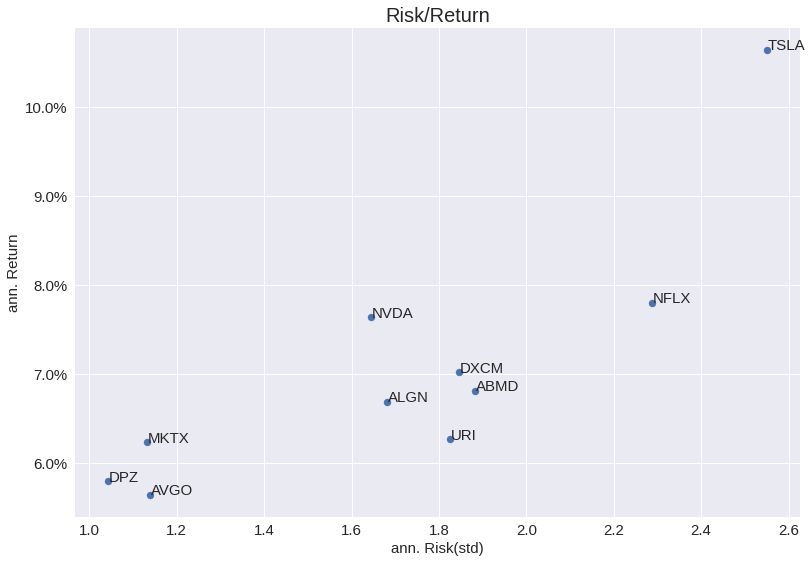

In [458]:
p=summary.plot(kind = 'scatter', x = "Risk", y="Return", figsize=(13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i,'Risk']+0.002,summary.loc[i,'Return']+0.002),size = 15)
plt.xlabel("ann. Risk(std)", fontsize=15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize=20)
p.axes.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

70.51431603606727